## PCA and VAE on binDefault and ysDefault

PCA = Principal Component Analysis

VAE = Variational Autoencoders, https://www.youtube.com/watch?v=9zKuYvjFFS8&t=419s, https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

binDefault = binary indicators of whether a household answered so a question in such a away, that they gain weigth regarding the PiN scores

ysDefault = PiN scores + INDICATOR + number of sectors where the person is in need

In [1]:
import csv
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
binDefault = np.load("../data/binDefault.npy",allow_pickle=True)
binFeatureName = np.load("../data/binFeatureName.npy",allow_pickle=True)
binDomainName = np.load("../data/binDomainName.npy",allow_pickle=True)

ysDefault = np.load("../data/ysDefault.npy",allow_pickle=True)
ysFeatureName = np.load("../data/ysFeatureName.npy",allow_pickle=True)
ysDomainName = np.load("../data/ysDomainName.npy",allow_pickle=True)

In [3]:
binDefault.shape, ysDefault.shape

((10378, 34), (10378, 10))

In [9]:
print(binDefault[:5,:])
print(binFeatureName)

[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['WASH_No_Water_Access' 'WASH_Below_15lpd' 'WASH_No_Latrine_Access'
 'WASH_Above_30min' 'WASH_No_Soap' 'SHELTER_Inadequate' 'SHELTER_Damaged'
 'SHELTER_Eviction_Risk' 'SHELTER_No_Basic_Items' 'SHELTER_Many_Families'
 'FOODSEC_FCS' 'FOODSEC_RCSI' 'FOODSEC_SAFE' 'FOODSEC_Market'
 'FOODSEC_Agriculture' 'LIVE_Income_Decrease' 'LIVE_Debt' 'LIVE_Coping'
 'LIVE_Cash' 'EDU_Not_Attending' 'EDU_Never_Attended_Formal' 'EDU_Barrier'
 'EDU_No_Supplies' 'HEALTH_Barrier' 'HE

In [5]:
print(ysDefault[:5,:])
print(ysFeatureName)

[[ 2.   1.   3.   3.   2.   0.   0.   0.  11.   5. ]
 [ 0.   3.   6.   2.   2.   0.   0.   0.  13.   4. ]
 [ 0.   3.   6.   2.   8.   0.   0.   0.  19.   4. ]
 [ 0.   3.   3.   0.   2.   0.   0.   0.   8.   3. ]
 [ 0.   1.   8.5  0.   2.   0.   0.   0.  11.5  3. ]]
['WEIGHT_WASH' 'WEIGHT_SHELTER' 'WEIGHT_FOODSEC' 'WEIGHT_LIVE'
 'WEIGHT_EDU' 'WEIGHT_HEALTH' 'WEIGHT_NUTRITION' 'WEIGHT_PROTECTION'
 'INDICATOR' 'N_SECTORS']


### A first scatter plot regarding correlation

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(binDefault)

In [8]:
pd.plotting.scatter_matrix(df.iloc[:1000,:5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ba145c1d0>,
      dtype=object)

## Using PCA

In [63]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
from time import time
n = 15
X = preprocessing.scale(binDefault)[:,:]

pca = PCA(n_components=n)
st = time()
PlotX_pca=pca.fit_transform(X)
ed = time()
print(PlotX_pca.shape," in seconds",ed-st)

useKernelPCA = False
# kernel pca is quadratic in the number of samples.
# with 1k in 0.13s
# 2k in 1s
# 4k in 7s
# 10k would be 7 * 11 ~= 144s

if useKernelPCA:
  kpca = KernelPCA(kernel="rbf",n_components=n) # ,gamma="scale")
  st = time()
  PlotX_kpca=kpca.fit_transform(X)
  ed = time()
  print(PlotX_kpca.shape," in seconds",ed-st)


(10378, 15)  in seconds 0.06001138687133789


a chunk of standardized data


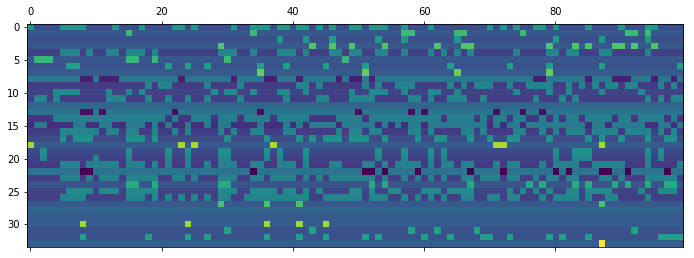

In [64]:
print("a chunk of standardized data")
plt.matshow(X[:100,:].T)
plt.show()

In [34]:
if useKernelPCA:
  plt.plot(kpca.lambdas_)
  plt.title("Size of largest Eigenvalues")
  plt.show()

All components upto index = [...] explain [...] of all variance
00 -> 8.1%
01 -> 15.2%
02 -> 21.3%
03 -> 26.5%
04 -> 30.7%
05 -> 34.4%
06 -> 37.9%
07 -> 41.3%
08 -> 44.6%
09 -> 47.7%
10 -> 50.8%
11 -> 53.8%
12 -> 56.8%
13 -> 59.7%
14 -> 62.6%


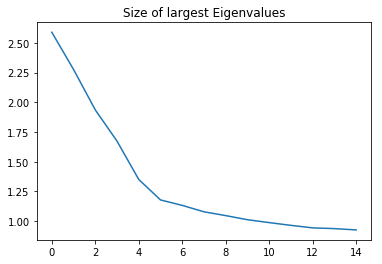

In [65]:
print("All components upto index = [...] explain [...] of all variance")
for i in range(n):
  print("%02d -> %2.1f%%" % (i,sum(pca.explained_variance_ratio_[:i+1]*100)))

plt.plot(pca.explained_variance_)
plt.title("Size of largest Eigenvalues")
plt.show()

PCA Plotting various components against each other


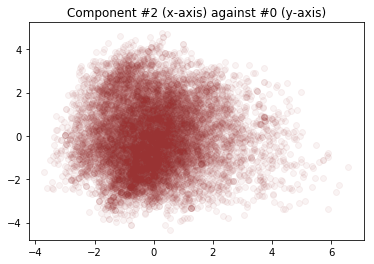

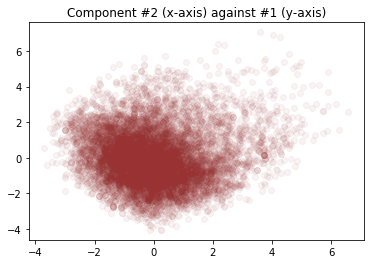

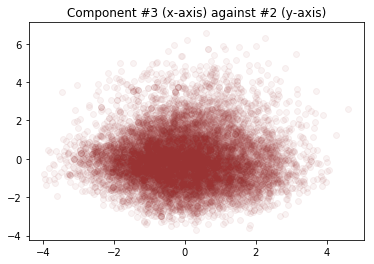

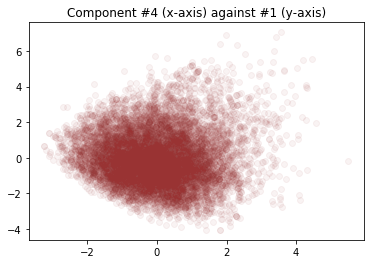

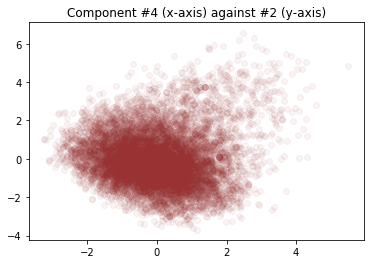

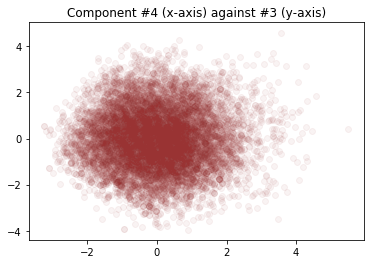

In [66]:
print("PCA Plotting various components against each other")
for i in range(5):
  for j in range(i):    
    plt.scatter(PlotX_pca[:,i],PlotX_pca[:,j],c=[[0.6,0.2,0.2,0.06]])
    plt.title("Component #%d (x-axis) against #%d (y-axis)" % (i,j))
    plt.show()

if useKernelPCA:
  print("==========================================================")
  print("KERNELPCA: Plotting various components against each other")
  for i in range(5):
    for j in range(i):    
      plt.scatter(PlotX_kpca[:,i],PlotX_kpca[:,j],c=[[0.6,0.2,0.2,0.06]])
      plt.title("Component #%d (x-axis) against #%d (y-axis)" % (i,j))
      plt.show()

## Variational Autoencoders

Using Keras example: https://tiao.io/post/tutorial-on-variational-autoencoders-with-a-concise-keras-implementation/

You might want to install keras,tensorflow: sudo python3 -m pip install tensorflow keras

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing

from keras import backend as K

from keras.layers import Input, Dense, Lambda, Layer, Add, Multiply
from keras.models import Model, Sequential
from keras.datasets import mnist

In [18]:
# load the data
data = np.copy(binDefault) #np.copy(np.concatenate((binDefault,ysDefault),axis=1))
shf = np.arange(data.shape[0])
np.random.shuffle(shf)

data_shf = data[shf]
ys_shf = np.copy(ysDefault)[shf]

#split into train and test
ntrain = int(data_shf.shape[0]*2/3)
ntest = data_shf.shape[0]-ntrain

x_train = data_shf[:ntrain,:]
y_train = ys_shf[:ntrain,:]
x_test = data_shf[ntrain:,:]
y_test = ys_shf[ntrain:,:]

In [19]:
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """
    
    #return K.mean(K.square(y_true-y_pred),axis=-1)
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)
#error_func="mean-squared-error"
error_func="binary_cross_entropy"

class KLDivergenceLayer(Layer):
    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """
    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs
        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)
        self.add_loss(K.mean(kl_batch), inputs=inputs)
        return inputs

### Network Architecture

In [20]:
inputD = data_shf.shape[1]
int1D = -1
int2D = -1
int3D = -1
int1D = int(inputD*0.8)
int2D = int(inputD*0.5)
#int3D = int(inputD*0.3)
latent_dim = 3
batch_size = 100
epochs = 50
epsilon_std = 1.0

x = Input(shape=(inputD,))

hLast = Dense(int1D, activation='relu')(x)
hLast = Dense(int2D, activation='relu')(hLast)
#hLast = Dense(int3D, activation='hard_sigmoid')(hLast)

z_mu = Dense(latent_dim)(hLast)
z_log_var = Dense(latent_dim)(hLast)

z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)

encoder = Model(x, z_mu)

decoder = Sequential([
    #Dense(int3D, activation='hard_sigmoid'),
    Dense(int2D, input_dim=latent_dim, activation='relu'), #input_dim=latent_dim, 
    Dense(int1D, activation='relu'), #input_dim=latent_dim,
    Dense(inputD, activation='hard_sigmoid')
])

eps = Input(tensor=K.random_normal(stddev=epsilon_std,
                                   shape=(K.shape(x)[0], latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])

x_pred = decoder(z)

vae = Model(inputs=[x, eps], outputs=x_pred)
vae.compile(optimizer='rmsprop', loss=nll)

In [21]:
vae.fit(x_train,
        x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Train on 6918 samples, validate on 3460 samples
Epoch 1/50
6918/6918 [==============================] - 1s 77us/step - loss: 21.1109 - val_loss: 19.4782
Epoch 2/50
6918/6918 [==============================] - 0s 22us/step - loss: 18.9228 - val_loss: 18.4127
Epoch 3/50
6918/6918 [==============================] - 0s 23us/step - loss: 18.3560 - val_loss: 18.3755
Epoch 4/50
6918/6918 [==============================] - 0s 20us/step - loss: 18.0468 - val_loss: 17.7966
Epoch 5/50
6918/6918 [==============================] - 0s 22us/step - loss: 17.7404 - val_loss: 17.4691
Epoch 6/50
6918/6918 [==============================] - 0s 22us/step - loss: 17.5789 - val_loss: 17.4601
Epoch 7/50
6918/6918 [==============================] - 0s 21us/step - loss: 17.4760 - val_loss: 17.4409
Epoch 8/50
6918/6918 [==============================] - 0s 20us/step - loss: 17.4285 - val_loss: 17.2737
Epoch 9/50
6918/6918 [==============================] - 0s 20us/step - loss: 17.2575 - val_loss: 17.0221
Epoch 1

Loss: 0.19550323019381163


[]

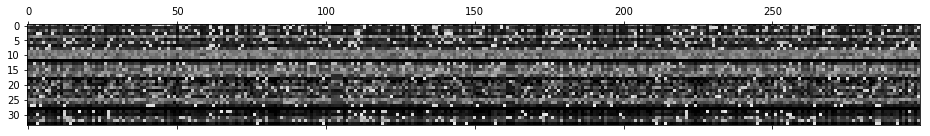

In [22]:
z_test = encoder.predict(x_test, batch_size=batch_size)
x_test_pred = decoder.predict(z_test, batch_size=batch_size)

diff = x_test - x_test_pred
res = np.copy(x_test_pred)
res[x_test_pred >= 0.5] = 1
res[x_test_pred <= 0.5] = 0
loss = np.count_nonzero(res-x_test)/np.product(res.shape)
print("Loss:",loss)

plt.matshow(np.abs(x_test-x_test_pred)[:300].T,vmin=0,vmax=1,cmap="gray")
plt.plot()

In [23]:
print(ysFeatureName)

plt.ioff()

using = "VAE" # "PCA" # "VAE"

# predict latent variables
if using == "PCA":
  pca.fit(x_train)
  z_test = pca.transform(x_test)
elif using == "VAE":
  z_test = encoder.predict(x_test, batch_size=batch_size)
  using = "%s_%d_%d_%d" % (using,int1D,int2D,int3D)
else:
  assert(False)

for thrs in np.linspace(0,10,21):
  print("thrs = ",thrs)
  
  y_test_scl = np.copy(y_test)
  indicatorMax = np.max(y_test_scl[:,-2])
  y_test_scl[:,-2] = y_test_scl[:,-2] / indicatorMax * 10 # scale down indicator to [0,0]
  
  above_threshold = np.copy(y_test_scl)
  above_threshold[y_test_scl>=thrs] = 1
  above_threshold[y_test_scl<thrs] = 0
  
  
  plt.figure(figsize=(40, 15))
  i = 1
  # visualize each of the 8 sector PiN scores
  nheight = int(latent_dim*(latent_dim-1)/2)
  for di1 in range(latent_dim):
    for di2 in range(di1):
      for si in range(8):
        print("si=",si,", di1=",di2,",di2=",di1,"i=",i)
        plt.subplot(nheight,9,i)
        plt.scatter(z_test[:, di2], z_test[:, di1], c=above_threshold[:,si],cmap='viridis',
                    alpha=.3, s=3**2,vmin=0,vmax=1)
        plt.colorbar()
        plt.title("%s>=%04.01f" % (ysFeatureName[si],thrs),loc="left")
        i=i+1

      plt.subplot(nheight,9,i)
      plt.scatter(z_test[:, di2], z_test[:, di1], c=above_threshold[:,-2],cmap='viridis',
                  alpha=.3, s=3**2,vmin=0)
      plt.colorbar()
      plt.title("scaled INDICATOR - z_%d vs z_%d" % (di2+1,di1+1))
      i=i+1

  plt.savefig(("images/"+using+"-latent"+str(latent_dim)+"-"+error_func+"-thrs%04.01f-loss%0.02f.png")%(thrs,loss))
  plt.close()
  
# convert to gif: using package imagemagick
# convert -delay 10 VAE_something* VAE_something_else.gif

['WEIGHT_WASH' 'WEIGHT_SHELTER' 'WEIGHT_FOODSEC' 'WEIGHT_LIVE'
 'WEIGHT_EDU' 'WEIGHT_HEALTH' 'WEIGHT_NUTRITION' 'WEIGHT_PROTECTION'
 'INDICATOR' 'N_SECTORS']
thrs =  0.0
si= 0 , di1= 0 ,di2= 1 i= 1
si= 1 , di1= 0 ,di2= 1 i= 2
si= 2 , di1= 0 ,di2= 1 i= 3
si= 3 , di1= 0 ,di2= 1 i= 4
si= 4 , di1= 0 ,di2= 1 i= 5
si= 5 , di1= 0 ,di2= 1 i= 6
si= 6 , di1= 0 ,di2= 1 i= 7
si= 7 , di1= 0 ,di2= 1 i= 8
si= 0 , di1= 0 ,di2= 2 i= 10
si= 1 , di1= 0 ,di2= 2 i= 11
si= 2 , di1= 0 ,di2= 2 i= 12
si= 3 , di1= 0 ,di2= 2 i= 13
si= 4 , di1= 0 ,di2= 2 i= 14
si= 5 , di1= 0 ,di2= 2 i= 15
si= 6 , di1= 0 ,di2= 2 i= 16
si= 7 , di1= 0 ,di2= 2 i= 17
si= 0 , di1= 1 ,di2= 2 i= 19
si= 1 , di1= 1 ,di2= 2 i= 20
si= 2 , di1= 1 ,di2= 2 i= 21
si= 3 , di1= 1 ,di2= 2 i= 22
si= 4 , di1= 1 ,di2= 2 i= 23
si= 5 , di1= 1 ,di2= 2 i= 24
si= 6 , di1= 1 ,di2= 2 i= 25
si= 7 , di1= 1 ,di2= 2 i= 26
thrs =  0.5
si= 0 , di1= 0 ,di2= 1 i= 1
si= 1 , di1= 0 ,di2= 1 i= 2
si= 2 , di1= 0 ,di2= 1 i= 3
si= 3 , di1= 0 ,di2= 1 i= 4
si= 4 , di1= 0 ,di

si= 7 , di1= 0 ,di2= 2 i= 17
si= 0 , di1= 1 ,di2= 2 i= 19
si= 1 , di1= 1 ,di2= 2 i= 20
si= 2 , di1= 1 ,di2= 2 i= 21
si= 3 , di1= 1 ,di2= 2 i= 22
si= 4 , di1= 1 ,di2= 2 i= 23
si= 5 , di1= 1 ,di2= 2 i= 24
si= 6 , di1= 1 ,di2= 2 i= 25
si= 7 , di1= 1 ,di2= 2 i= 26
thrs =  6.0
si= 0 , di1= 0 ,di2= 1 i= 1
si= 1 , di1= 0 ,di2= 1 i= 2
si= 2 , di1= 0 ,di2= 1 i= 3
si= 3 , di1= 0 ,di2= 1 i= 4
si= 4 , di1= 0 ,di2= 1 i= 5
si= 5 , di1= 0 ,di2= 1 i= 6
si= 6 , di1= 0 ,di2= 1 i= 7
si= 7 , di1= 0 ,di2= 1 i= 8
si= 0 , di1= 0 ,di2= 2 i= 10
si= 1 , di1= 0 ,di2= 2 i= 11
si= 2 , di1= 0 ,di2= 2 i= 12
si= 3 , di1= 0 ,di2= 2 i= 13
si= 4 , di1= 0 ,di2= 2 i= 14
si= 5 , di1= 0 ,di2= 2 i= 15
si= 6 , di1= 0 ,di2= 2 i= 16
si= 7 , di1= 0 ,di2= 2 i= 17
si= 0 , di1= 1 ,di2= 2 i= 19
si= 1 , di1= 1 ,di2= 2 i= 20
si= 2 , di1= 1 ,di2= 2 i= 21
si= 3 , di1= 1 ,di2= 2 i= 22
si= 4 , di1= 1 ,di2= 2 i= 23
si= 5 , di1= 1 ,di2= 2 i= 24
si= 6 , di1= 1 ,di2= 2 i= 25
si= 7 , di1= 1 ,di2= 2 i= 26
thrs =  6.5
si= 0 , di1= 0 ,di2= 1 i= 1